<a href="https://colab.research.google.com/github/there-exist/thereexist_/blob/master/2019_12_03_poisson_process_inverse_laplace_vs_analytical_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import library

import numpy as np
import matplotlib.pyplot as plt
import mpmath as mp

mp.dps = 12; mp.pretty = True

In [0]:
def Qu(N):
    i = np.array([np.linspace(0,N,N+1)])
    k = i.T
    
    Qu = np.sqrt(2/(N+1))*np.cos(k*(i+0.5)*np.pi / (N+1))
    
    Qu = Qu.T
    
    Qu[:,0] = np.sqrt(1/(N+1))
    
    return Qu

In [0]:
def hat_psi(u,k):
    return k / (k+u)

In [0]:
def D(u,k):  
    psi = hat_psi(u,k)
    return u*psi / (1-psi)

In [0]:
def laplace_domain_G(n,m,N,u,k):
    
    Qua = Qu(N)

    i = np.linspace(0,N,N+1)
    M = -4 * np.sin(i*np.pi / (2 * (N+1)))**2
    
        
    Da = D(u,k)
    

    q1 = Qua[n,:]
    q2 = Qua[m,:]
    denominator = u - M*Da
       
    result = np.sum(np.multiply(np.multiply(q1,q2),denominator**-1))

    return result

In [6]:
laplace_domain_G(n = 3,m = 5,N = 10,u = 10,k = 1)

0.000595208589916173

In [0]:
def G_graph(u_initial, u_final, slicing_number, n, m, N, k):
  
    U = np.linspace(u_initial,u_final,slicing_number)

    Ga = []

    for i in U:

        result = laplace_domain_G(n, m, N, i, k)
        Ga.append(result)
 

    return U, Ga

CPU times: user 59 ms, sys: 750 µs, total: 59.7 ms
Wall time: 71.3 ms


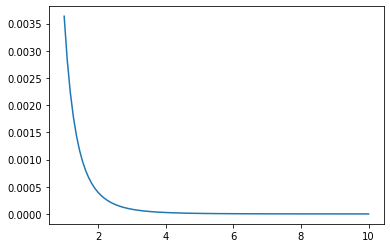

In [8]:
%%time

U, Ga = G_graph(u_initial = 1, u_final = 10, slicing_number = 100, n = 45, m = 50, N = 100, k = 1)

plt.plot(U,Ga)

CPU times: user 154 ms, sys: 4.58 ms, total: 159 ms
Wall time: 152 ms


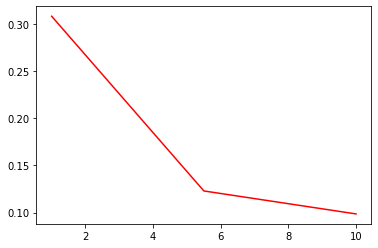

In [9]:
%%time
laplace_G = lambda u: laplace_domain_G(5,5,10,u,1)

#laplace_domain_G(n,m,N,u,k)

Time = mp.linspace(1,10,3)

time_domain_G = []

for i in Time:
    result = mp.invertlaplace(laplace_G, i, method= 'stehfest')
    
    time_domain_G.append(result) 
    
    
plt.plot(Time,time_domain_G,'r-')

In [0]:

def G_t(t_initial, t_final, slicing_number, n, m, N, k):

  laplace_G = lambda u: laplace_domain_G(n,m,N,u,k)

  #laplace_domain_G(n,m,N,u,k)

  Time = mp.linspace(t_initial,t_final,slicing_number)

  time_domain_G = []

  for i in Time:
      result = mp.invertlaplace(laplace_G, i, method= 'stehfest')
    
      time_domain_G.append(result) 

  return Time, time_domain_G   

In [0]:
def time_domain_G(n,m,N,t,k):
    
    Qua = Qu(N)

    i = np.linspace(0,N,N+1)
    M = -4 * np.sin(i*np.pi / (2 * (N+1)))**2
            

    q1 = Qua[n,:]
    q2 = Qua[m,:]
    denominator = np.exp(k*M*t)
       
    result = np.sum(np.multiply(np.multiply(q1,q2),denominator))
       
    return result

In [28]:
time_domain_G(n = 3,m = 5,N = 10,t = 5,k = 5)

0.09093606729478176

In [0]:
def G_t2(t_initial, t_final, slicing_number, n, m, N, k):
  
  T = np.linspace(t_initial,t_final,slicing_number)

  Ga_t = []

  for i in T:

    G = time_domain_G(n, m, N, i, k )
    Ga_t.append(G)
 

  return T, Ga_t

CPU times: user 16.9 ms, sys: 991 µs, total: 17.9 ms
Wall time: 23.8 ms


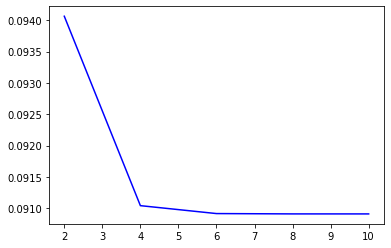

In [30]:
%%time

t2, g2 = G_t2(t_initial = 2, t_final = 10, slicing_number = 5, n = 3, m = 5, N = 10, k = 5)

plt.plot(t2,g2,'b-')

CPU times: user 236 ms, sys: 3.2 ms, total: 239 ms
Wall time: 235 ms


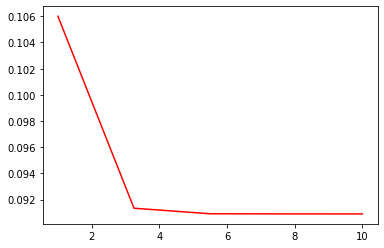

In [31]:
%%time
t1, g1 = G_t(t_initial = 1, t_final = 10, slicing_number = 5, n = 3, m = 5, N = 10, k = 5)

plt.plot(t1,g1,'r-')


CPU times: user 1min 19s, sys: 23 ms, total: 1min 19s
Wall time: 1min 19s


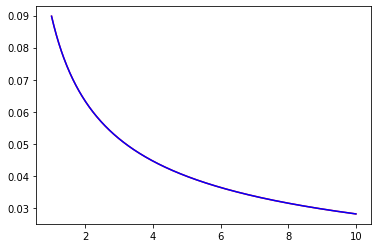

In [35]:
%%time
t1, g1 = G_t(t_initial = 1, t_final = 10, slicing_number = 500, n = 50, m = 50, N = 100, k = 10)
t2, g2 = G_t2(t_initial = 1, t_final = 10, slicing_number = 500, n = 50, m = 50, N = 100, k = 10)

plt.plot(t1,g1,'r-')
plt.plot(t2,g2,'b-')

CPU times: user 824 ms, sys: 725 µs, total: 825 ms
Wall time: 832 ms


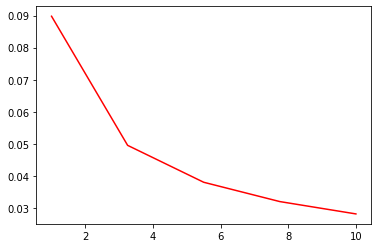

In [33]:
%%time
t1, g1 = G_t(t_initial = 1, t_final = 10, slicing_number = 5, n = 50, m = 50, N = 100, k = 10)


plt.plot(t1,g1,'r-')


In [0]:
## random walk simulation code part

'''
Time functions

Boundary : follow poisson process
Bulk : power law process
'''


def waiting_time(k):
    return -np.log(np.random.rand()) / k

def Random_walk_simulation(nr, kf, kb, k, m, N, T, dt):

    '''
    list of variable
    # nr : number of repetition
    # kf : forward rate
    # kb : backward rate
    # k : constant related with jumping rate in bulk
    # m : initial position of particle
    # N : upper boundary of particle
    # T : total time (from 0 to T)
    # dt : time interval
    '''

    M = int(np.round(T / dt, 0))

    discrete_time_space = np.linspace(0, T, M)
    time_dependent_position_function = np.zeros((nr, M))
    survive_probability_function = np.ones((nr, M))

    '''
    discrete_time_space : split [0,T] range by M pieces
    time_dependent_position_function & survive_probability_function : Because of nr times repetition,
    I defined as (nr,M) matrices. After simulation, np.sum(OOO, axis = 0) / nr -> average data
    '''

    for i in range(0, nr):


        '''
        i_th simulation start here
        '''

        t = 0  # initial time
        n = m  # initial position
        nb = m  # initial position(2)
        idxb = 0  # index (2)

        '''
        nb and idxb were defined to draw the time_dependent_position_graph
        '''

        while True:

            '''
            boundary condition description
            '''

            if n == 0:
                left_jump_at_zero = waiting_time(kf)
                right_jump_at_zero = waiting_time(k)

                if left_jump_at_zero < right_jump_at_zero:

                    n = -1
                    t += left_jump_at_zero

                else:

                    n = 1
                    t += right_jump_at_zero

            if n == -1:
                right_jump_at_minus = waiting_time(kb)

                n = 0
                t += right_jump_at_minus

            '''
            Green's function을 구하면서, L_FP에 해당하는 matrix form을 보니,
            reflecting boundary condition이지만, 시간 term을 주는 것이 
            맞을 것 같아 이를 추가. (2019.11.29)
            '''

            if n == N:

                n -= 1
                t += waiting_time(k)

            else:

                left_jump_at_bulk = waiting_time(k)
                right_jump_at_bulk = waiting_time(k)

                if left_jump_at_bulk < right_jump_at_bulk:
                    n -= 1
                    t += left_jump_at_bulk

                else:

                    n += 1
                    t += right_jump_at_bulk

            # now, (t,n) value comes out from the while loop
            # survival probability : 0 for n == -1, 1 for n != -1.

            # break the code (time boundary)

            if t > T:
                break

            idx = int(np.round(t / dt, 0))

            '''
            이 부분을 만드는데 조금 애를 먹음... 이제는 정확하게 time_dependent_position_function이 나옴을 확인함.(2019.11.22)
            '''

            # print("before change :", idxb, nb)
            time_dependent_position_function[i, idxb:idx - 1] = nb
            time_dependent_position_function[i, idx:] = n

            '''
            event가 나기 전까지는 nb에 위치하고, event가 일어나면 n으로 이동한다.
            그러면서 idxb와 nb를 각각 idx와 n으로 바꿔준다.
            이러한 과정을 통해 반영을 해본 것이다.

            ex) 10의 위치에 있었는데 4초에 jump가 생겨 9로 이동한 경우

            time_dependent_position_function[i,:] = [10,10,10,10,9,9,9,9,9,9,9]

            그 뒤에 8초에 jump가 생겨 8로 이동

            time_dependent_position_function[i,:] = [10,10,10,10,9,9,9,9,8,8,8]

            '''

            idxb = idx
            nb = n
            # print("idx, n = (", idx, n,")")
            # print("after change :", idxb, nb)

    average_time_dependent_position_function = np.sum(time_dependent_position_function, axis = 0) / nr
    # print(time_dependent_position_function)

    survive_probability_function[time_dependent_position_function == -1] = 0
    average_survive_probability_function = np.sum(survive_probability_function, axis = 0) / nr

#     plt.figure(figsize = (20, 10))

#     print("input number information")
#     print(" nr(number of repetition):", nr, "\n kf(forward rate):", kf, "\n kb(backward rate):", kb,
#           "\n td:", td, "\n a:", a, "\n m(initial position):", m, "\n N(upper boundary):", N,
#           "\n T(Total measuring time):", T, "\n dt(time interval):", dt)

#     plt.subplot(221)
#     plt.title("time-dependent-position")
#     plt.xlabel("time")
#     plt.ylabel("position")
#     plt.plot(discrete_time_space, average_time_dependent_position_function.T)

#     plt.subplot(222)
#     plt.title("survival probability function")
#     plt.xlabel("time")
#     plt.ylabel("S(t)")
#     plt.plot(discrete_time_space, average_survive_probability_function.T)
#     plt.show()
    
    return discrete_time_space, average_time_dependent_position_function, average_survive_probability_function

In [0]:
%%time

T, Position, Survive = Random_walk_simulation(nr = 1000, kf, kb, k, m, N, T, dt)

t1, g1 = G_t(t_initial = 1, t_final = 10, slicing_number = 5, n = 50, m = 50, N = 100, k = 10)
t2, g2 = G_t2(t_initial = 1, t_final = 10, slicing_number = 5, n = 50, m = 50, N = 100, k = 10)


plt.plot(t1,g1,'r-')
plt.plot(t2,g2,'b-')
